In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

/home/alex/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 128
nb_classes = 10
nb_epoch = 25
# image size
img_rows, img_cols = 32, 32
# RGB channels
img_channels = 3
# Name of classes from CIFAR-10 dataset
classes=['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


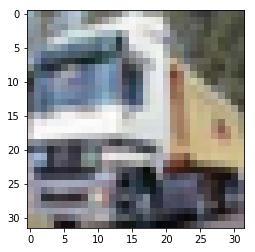

Class number: [9]
Object type: truck


In [4]:
n = 1
plt.imshow(toimage(X_train[n]))
plt.show()
print("Class number:", y_train[n])
print("Object type:", classes[y_train[n][0]])

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [7]:
# Create a sequential model
model = Sequential()
# First convolutional layer
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# First subsample layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer Dropout
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Fourth convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
# Second subsample layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# Regularization layer Dropout
model.add(Dropout(0.25))
# Layer of conversion from 2D data to flat view
model.add(Flatten())
# Fully connected layer for classification
model.add(Dense(512, activation='relu'))
# Regularization layer Dropout
model.add(Dropout(0.5))
# Outcome fully connected layer
model.add(Dense(nb_classes, activation='softmax'))

In [8]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 83s - loss: 1.6392 - acc: 0.4019 - val_loss: 1.2647 - val_acc: 0.5468
Epoch 2/25
 - 93s - loss: 1.2145 - acc: 0.5634 - val_loss: 0.9752 - val_acc: 0.6568
Epoch 3/25
 - 91s - loss: 1.0277 - acc: 0.6340 - val_loss: 0.8614 - val_acc: 0.6958
Epoch 4/25
 - 90s - loss: 0.9135 - acc: 0.6788 - val_loss: 0.7866 - val_acc: 0.7258
Epoch 5/25
 - 102s - loss: 0.8277 - acc: 0.7094 - val_loss: 0.7718 - val_acc: 0.7328
Epoch 6/25
 - 112s - loss: 0.7656 - acc: 0.7297 - val_loss: 0.7065 - val_acc: 0.7626
Epoch 7/25
 - 98s - loss: 0.7122 - acc: 0.7477 - val_loss: 0.6971 - val_acc: 0.7536
Epoch 8/25
 - 89s - loss: 0.6738 - acc: 0.7619 - val_loss: 0.6392 - val_acc: 0.7816
Epoch 9/25
 - 88s - loss: 0.6297 - acc: 0.7786 - val_loss: 0.6841 - val_acc: 0.7650
Epoch 10/25
 - 88s - loss: 0.6032 - acc: 0.7868 - val_loss: 0.6083 - val_acc: 0.7938
Epoch 11/25
 - 92s - loss: 0.5658 - acc: 0.7979 - val_loss: 0.6197 - val_acc: 0.7938
Epoch 12/25
 - 92s - lo

In [11]:
# Evaluate the quality of the model on test set
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Quality on the test dataset: %.2f%%" % (scores[1]*100))

Quality on the test dataset: 79.48%


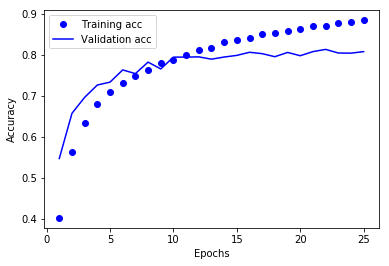

In [12]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


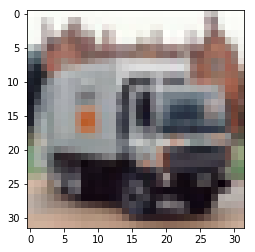

In [13]:
index=11
plt.imshow(toimage(X_test[index]))
plt.show()

In [14]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

In [15]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])
print(classes[y_test[index][0]])

truck
truck


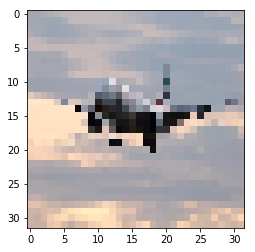

In [16]:
img_path = 'plane.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

In [17]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

In [18]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

plane
